In [2]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import pandas as pd
import numpy as np
from cnp.experiment import WorkingDirectory, generate_root
import os
import matplotlib.pyplot as plt
import matplotlib

# os.chdir('/home/james/code/kernelcnp')
root = '/scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results'

In [21]:
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 100 

In [28]:
models = ["GNP", 'ANP', "AGNP", "convGNP", "convNP", "FullConvGNP"]
colours = ["tab:blue", "tab:orange", "tab:purple", "tab:olive", "tab:red", "tab:green"]
datas = ["eq", "matern", "noisy-mixture", "sawtooth", "weakly-periodic"]
markers = ["o", "x", "s"]
covs = ["innerprod-homo", "kvv-homo", "meanfield"]
seeds = ['0']
dims = ['1']

In [29]:
mean_field_models = ['ANP', 'convNP', 'FullConvGNP']

In [30]:
experiments = []
row_labels = []
column_labels = []
for m, colour in zip(models, colours):
    for d in datas:
        for s in seeds:
            for dim in dims:
                for c, marker in zip(covs, markers):
                    if m in mean_field_models and c != "meanfield":
                        pass
                    else:          
                        experiment_name = os.path.join(f'{root}', 
                                                       f'{d}',
                                                       'models', 
                                                       f'{m}',
                                                       f'{c}',
                                                       f'seed-{s}',
                                                       f'dim-{dim}')

                        wd = WorkingDirectory(root=experiment_name, print_root=False)
                        experiments.append((d, m, c, s, colour, marker, wd.root, dim ))
                
row_labels.append("Oracle-GP")
                
for m in models:
    for c in covs:
        if m in mean_field_models and c != "meanfield":
            continue
        else:
            row_labels.append(f'{m}-{c}')
        

for d in datas:
    column_labels.append(f'{d}')
    column_labels.append(f'{d}-error')
    column_labels.append(f'{d}-iterations')
    column_labels.append(f'{d}-num-params')

column_labels.append("marker")
column_labels.append("colour")


# Create an empty dataframe
df = pd.DataFrame(index=row_labels, columns=column_labels)

In [31]:
for d in datas:
    experiment_name = os.path.join(f'{root}', 
                                   f'{d}',
                                   'models', 
                                   'Oracle-GP/seed-0/dim-1')

    wd = WorkingDirectory(root=experiment_name, print_root=False)
    if os.path.isfile(os.path.join(wd.root, 'test_log_likelihood.txt')):
        mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                                exists=True))/np.sqrt(2048)
        df.at["Oracle-GP", f'{d}'] = mean
        df.at["Oracle-GP", f'{d}-error'] = error
    else:
        print(f'No results {wd.root}')

No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/eq/models/Oracle-GP/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/matern/models/Oracle-GP/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/noisy-mixture/models/Oracle-GP/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/sawtooth/models/Oracle-GP/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/weakly-periodic/models/Oracle-GP/seed-0/dim-1


In [32]:
for e in experiments:
    d, m, c, s, colour, marker, r, dim = e
    row_label = f'{m}-{c}'
    experiment_name = os.path.join(f'{root}', 
                                   f'{d}',
                                   'models', 
                                   f'{m}',
                                   f'{c}',
                                   f'seed-{s}',
                                   f'dim-{dim}')

    wd = WorkingDirectory(root=experiment_name, print_root=False)
    if os.path.isfile(os.path.join(wd.root, 'test_log_likelihood.txt')):
        mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                                exists=True))
        num_params = np.loadtxt(wd.file('num_params.txt',
                                exists=True))
        
        df.at[row_label, f'{d}-num-params'] = num_params
        
        df.at[row_label, f'{d}'] = mean
        df.at[row_label, f'{d}-error'] = error
        df.at[row_label, 'colour'] = colour
        df.at[row_label, 'marker'] = marker
    else:
        print(f'No results {wd.root}')
    
    if os.path.isfile(os.path.join(wd.root, 'last_epoch.txt')):
        iteration = np.loadtxt(wd.file('last_epoch.txt',
                                    exists=True))
        df.at[row_label, f'{d}-iterations'] = iteration



No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/eq/models/GNP/innerprod-homo/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/eq/models/GNP/kvv-homo/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/eq/models/GNP/meanfield/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/matern/models/GNP/innerprod-homo/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/matern/models/GNP/kvv-homo/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/matern/models/GNP/meanfield/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/noisy-mixture/models/GNP/innerprod-homo/seed-0/dim-1
No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/noisy-mix

In [11]:
df

,eq,eq-error,eq-iterations,eq-num-params,matern,matern-error,matern-iterations,matern-num-params,noisy-mixture,noisy-mixture-error,...,weakly-periodic,weakly-periodic-error,weakly-periodic-iterations,weakly-periodic-num-params,weakly-periodic-slow,weakly-periodic-slow-error,weakly-periodic-slow-iterations,weakly-periodic-slow-num-params,marker,colour
Oracle-GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GNP-innerprod-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GNP-kvv-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GNP-meanfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANP-meanfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGNP-innerprod-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGNP-kvv-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGNP-meanfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
convGNP-innerprod-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
convGNP-kvv-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['sawtooth']

/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oracle-GP                      NaN
GNP-innerprod-homo       -0.155811
GNP-kvv-homo              0.029981
GNP-meanfield            -0.155974
ANP-meanfield            -0.155605
AGNP-innerprod-homo      -0.155605
AGNP-kvv-homo            -0.902852
AGNP-meanfield            -0.15566
convGNP-innerprod-homo    1.354571
convGNP-kvv-homo          2.243313
convGNP-meanfield         2.175617
convNP-meanfield          1.581517
FullConvGNP-meanfield     1.686232
Name: sawtooth, dtype: object

In [11]:
def plot_results(d, df):
    plt.xticks([])
    x = np.arange(len(df[d]))
    ones = np.ones_like(x)
    y = df[d]
    e = df[d + '-error']
    oracle_result = df[d]["Oracle-GP"]
    oracle_error = df[d + "-error"]["Oracle-GP"]
    label = df.index
    colour = df['colour'].tolist()
    marker = df['marker'].tolist()
    
    
    for i in range(1, len(x)):
        plt.errorbar(x[i], y[i], e[i], marker=marker[i], color=colour[i], label=label[i])

    plt.plot(x, oracle_result * ones, label='Oracle-GP', color='k')
    plt.fill_between(x,
                     (oracle_result + oracle_error) * ones,
                     (oracle_result - oracle_error) * ones,
                     color='k', alpha=0.1)



    plt.legend( ncol=2 ,bbox_to_anchor=(1, 0))
    plt.title(d)
    plt.show()


/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


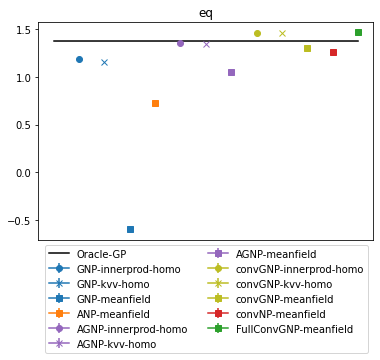

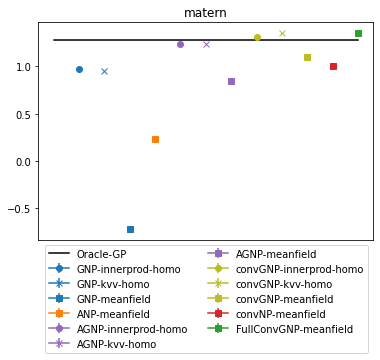

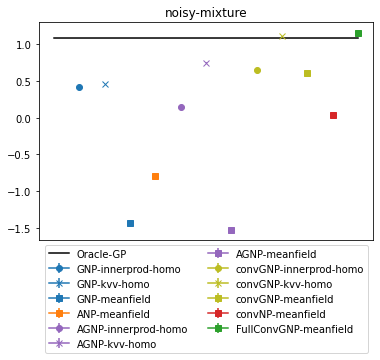

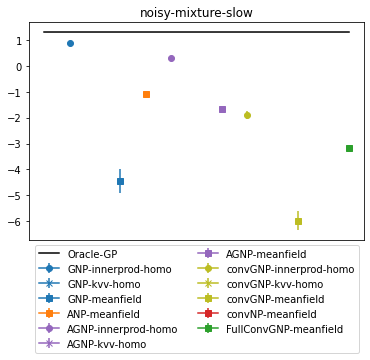

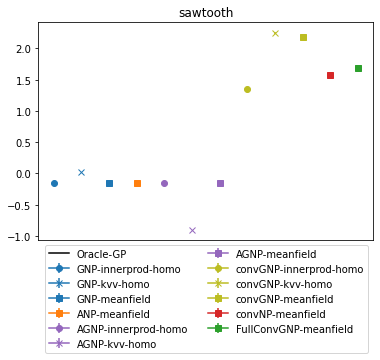

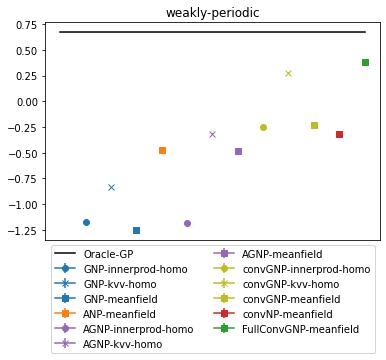

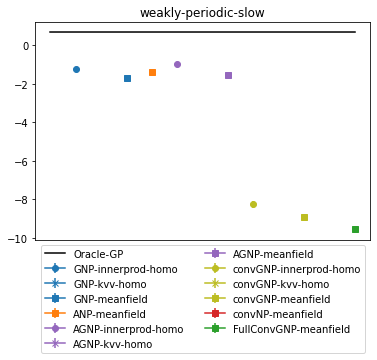

In [12]:
for d in datas:
    plot_results(d, df)